##Karla González Sánchez | A01541526

En este notebook, se resuelve una tarea de clasificación utilizando el conjunto de datos CIFAR-10. Se entrena una red neuronal para identificar y clasificar imágenes en una de las 11 clases diferentes. Estas clases son 'avion', 'auto', 'pajaro', 'gato', 'venado', 'perro', 'rana', 'sapo', 'caballo', 'barco', y 'camion'. Nuestro modelo aprenderá a reconocer y asignar automáticamente una etiqueta a cada imagen según su contenido.



###Importar Tensorflow

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

###Preparar dataset CIFAR10
Se hace la carga de datos y se normalizan los valores de pixeles de las imágenes dividiéndolos por 255. Esto escala los valores de pixeles en el rango [0, 1].

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#Normalizar
train_images, test_images = train_images / 255.0, test_images/255

170498071/170498071 [==============================] - 5s 0us/step


###Validación de datos

Se define una lista `class_names` que contiene los nombres de las clases a las que pertenecen las imágenes en el conjunto de datos `CIFAR-10`. Posteriormente, se crea una figura para visualizar las primeras 25 imágenes del conjunto de entrenamiento, junto con sus etiquetas correspondientes.

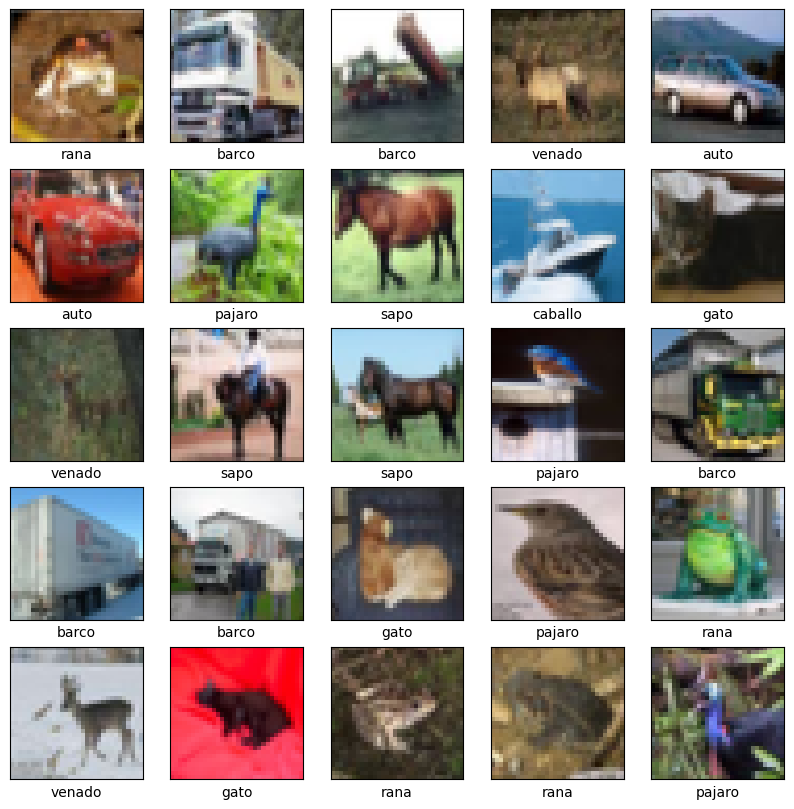

In [ ]:
class_names=['avion', 'auto', 'pajaro', 'gato', 'venado', 'perro', 'rana', 'sapo', 'caballo', 'barco', 'camion']

plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])

plt.show()

###Capas de convolución
Se define un modelo donde la arquitectura de la CNN está compuesta por tres capas convolucionales seguidas de capas de max-pooling.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))

###Arquitectura
Cada capa convolucional aplica filtros para extraer características de la entrada, y las capas de max-pooling reducen la dimensionalidad espacial de las características extraídas. La salida final de esta parte de la red será un tensor con forma (None, 4, 4, 64), que luego puede alimentarse a capas adicionales para realizar tareas específicas, como en este caso la clasificación de objetos en imágenes.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

###Capas densas
Tres capas convolucionales seguidas de capas de max-pooling, una capa de aplanamiento y dos capas densas. Está diseñado para la clasificación en 10 clases diferentes. Las capas densas están configuras con 60 y 20 neuronas respectivamente, para que el modelo generalice mejor los datos.

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(54, activation = 'relu'))
model.add(layers.Dense(10, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

###Entrenamiento
Se compila el modelo especificando el optimizador, la función de pérdida y las métricas que se utilizarán durante el entrenamiento. En este caso, Adam y la función de pérdida de Sparce Categorical Crossentropy. Además, Se entrena el modelo utilizando los datos de entrenamiento y validación. El modelo se entrena con 15 épocas. **Así, aumentando el número de épocas es donde se logra que el modelo obtenga una precisión mayor que la que se pudo obtener durante la clase de forma que ayudamos a obtener un mayor val_accuaracy.**

In [ ]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=15,
                    validation_data=(test_images, test_labels))

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 20s 6ms/step - loss: 1.5167 - accuracy: 0.4459 - val_loss: 1.2148 - val_accuracy: 0.5660
Epoch 2/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1418 - accuracy: 0.5954 - val_loss: 1.0473 - val_accuracy: 0.6259
Epoch 3/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9894 - accuracy: 0.6540 - val_loss: 0.9690 - val_accuracy: 0.6575
Epoch 4/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8957 - accuracy: 0.6864 - val_loss: 0.9362 - val_accuracy: 0.6762
Epoch 5/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8250 - accuracy: 0.7125 - val_loss: 0.8799 - val_accuracy: 0.6911
Epoch 6/15
1563/1563 [==============================] - 9s 5ms/step - loss: 0.7679 - accuracy: 0.7310 - val_loss: 0.8994 - val_accuracy: 0.7022
Epoch 7/15
1563/1563 [==============================] - 9s 5ms/step - loss: 0.7190 - accuracy: 0.7488 - val_loss: 0.8820 - val_accuracy: 0.6994
Ep

###Evaluación

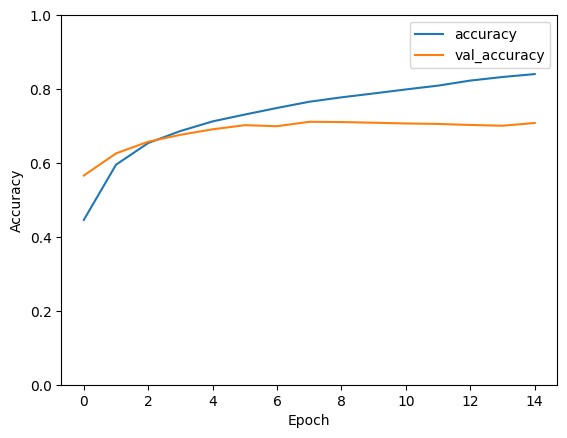

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend()

###Predicción
Se realizan predicciones utilizando el modelo entrenado en el conjunto de prueba y se imprime la probabilidad de pertenecer a una de las 11 clases para una imagen `n`.

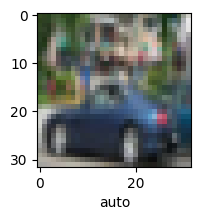

In [ ]:
# numero de imagen
n = 122
plt.figure(figsize=(2,2))
plt.imshow(test_images[n])
plt.xlabel(class_names[test_labels[n][0]])
plt.show()

In [ ]:
predictions = model.predict(test_images)
print(predictions[n])

import numpy as np

print("La imagen pertenece al grupo {} con una probabilidad de {:.2f} %"
      .format(class_names[np.argmax(predictions[n])], 100 * np.max(predictions[n])))

313/313 [==============================] - 1s 2ms/step
[0.4601135  0.9995485  0.18001093 0.17330302 0.49270245 0.0025876
 0.08546967 0.22589824 0.09439578 0.07869991]
La imagen pertenece al grupo auto con una probabilidad de 99.95 %


El modelo hizo la predicción de forma correcta, ya que obtenemos una imagen de la clase 'auto'.


Se puede decir que tenemos una probabilidad (del 99.96%), un accuracy (79.27%), y val_accuracy (72.04%) relativamente buenos, sin embargo, el modelo en algunas ocasiones sigue sin hacer las predicciones correctas. Esto puede ser explicado por el accuracy y val_accuracy. Unas forma de mejorarlo podría ser aumentar el número de épocas, trabajar con más datos, etc.